# Joining data

Data is often organized into different tables that be combined in different ways to obtain a dataset of interest
- Each table has a column with a unique identifier (`primary key`) for each row
- This process of joining data depends on a `common identifier (key)` in the different tables

![data_relational.png](images/data_relational.png)

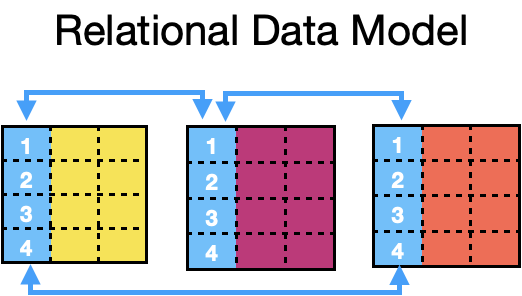

---
## Data preparation

We will use simulated polyclinic data showing 4 datasets
- ```visit```: patient visits to polyclinics
- ```lab```: lab tests for each visit
- ```diagnosis```: diagnosis for each visit
- ```patient```: patient data and identifier

In [ ]:
library(tidyverse)

visit <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/tidy_visit.csv")
lab <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/tidy_lab.csv")
diagnosis <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/tidy_diagnosis.csv")
patient <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/tidy_patient.csv")

Let us take a look at the 4 datasets
- Note columns that have a common identifier that we could use for joining the data

In [ ]:
head(visit)
head(patient)
head(diagnosis)
head(lab)

We can represent the relationships between the datasets as an entity relationship (ER) diagram, as previously covered in the lesson on data modelling

![join_model.png](images/join_model.png)

---
## Combining columns (datasets with common key)

Different columns from tables can be joined using relational operators based on a `common key`
- ```inner_join```
- ```left_join```
- ```right_join```
- ```full_join```

### 1. Inner join

For an `inner join`, only rows that have matching keys in both tables are included

![join_inner.png](images/join_inner.png)

As an example, we will `inner join` the `visit` dataset to the `patient` dataset
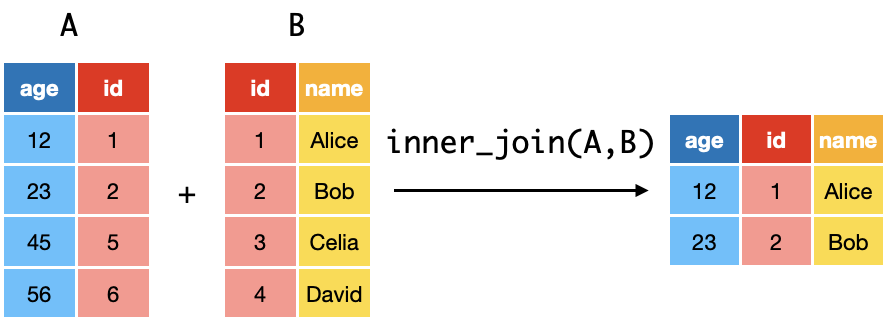

In [ ]:
visit
patient 

We can perform the join with or without the pipe syntax
- `inner_join(visit, patient)` (without pipe syntax)
- `visit %>% inner_join(patient)` (pipe syntax)

The common key will be inferred but we can also explicitly state it by specifying `by = "common key"`

In [ ]:
visit %>% inner_join(patient)

### 2. Left join

For an `left join`, **all** rows of the **left** table are included. For the data on the **right** table
- if there is a matching key, the data are included
- if there is no matching key, an `NA` value will be added

![join_left.png](images/join_left.png)

As an example, we will `left join` the `visit` dataset to the `lab` dataset
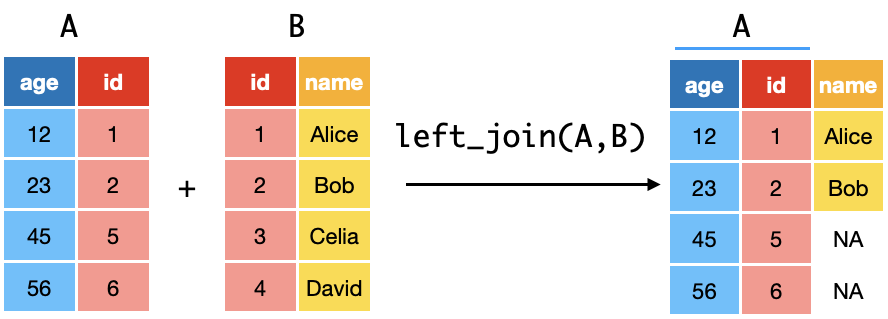

In [ ]:
visit
lab

In [ ]:
visit %>% left_join(lab)

Note that in this left join
- All data from the left table ```visits``` is included
- Patients that have records of `lab` tests have their data included in the join
- Patients (visit ID 3,4,6,8) that do not have records of ```lab``` tests have ```NA``` values

### 3. Right join

For an `right join`, **all** rows of the **right** table are included. For the data on the **left** table
- if there is a matching key, the data are included
- if there is no matching key, an `NA` value will be added

![join_right.png](images/join_right.png)

As an example, we will `inner join` the `visit` dataset to the `patient` dataset
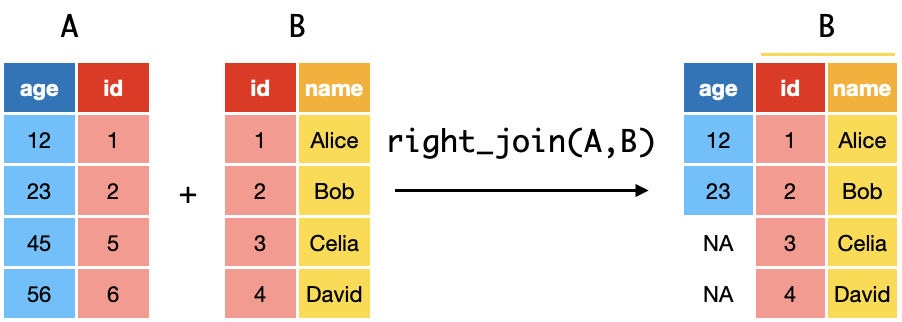

In [ ]:
visit %>% right_join(patient)

Note that in this right join
- All patient data in the right table ```patient``` are retained
- Patients with matching keys in the left table are included
- Patient 5 had no matching keys and was assigned ```NA``` values

### 4. Full join

For an `full join`, **all** rows of **both** tables are included. For the data in the **both** tables
- if there is a matching key, the data are included
- if there is no matching key, an `NA` value will be added

![join_full.png](images/join_full.png)

As an example, we will `full join` all 4 datasets: `visit`, `patient`, `diagnosis` and `lab`
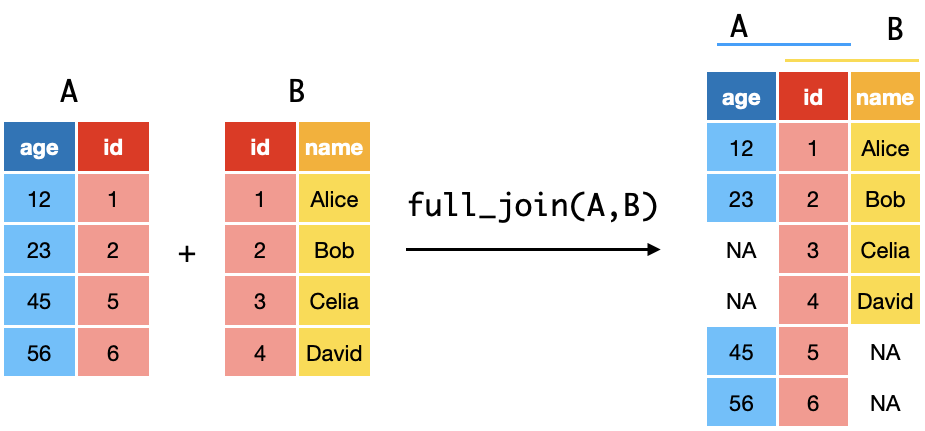

In [ ]:
visit
patient
diagnosis
lab

In [ ]:
visit %>% 
full_join(patient) %>%
full_join(diagnosis) %>%
full_join(lab)

Note that in this full join
- All data from the tables are retained
- Where are are no records matching between tables, the values are marked as ```NA```

---
## Filtering based on join to another table

This is similar to the join functions, except that the data from the other table is not included
- It is used to filter rows in one table, based on whether the key is present in the other table

### 1. Semi-join

For a `semi-join`, rows in the **left** are **included** if there is a matching key in the **right** table

![join_semi.png](images/join_semi.png)

As an example, we will `semi-join` the `visit` and the `lab` datasets
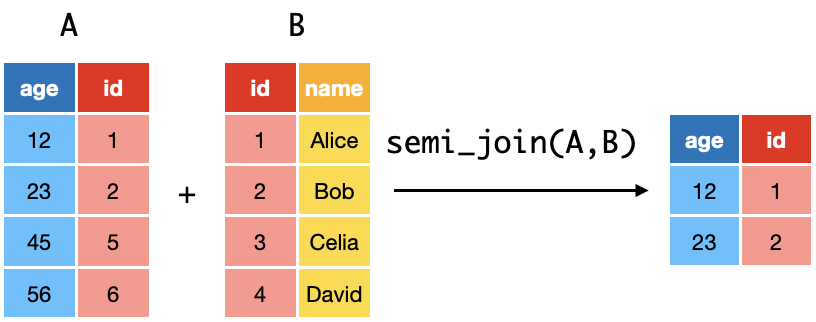

In [ ]:
visit %>% semi_join(lab)

Note that in this semi-join
- Only `visits` that have a matching ```patient``` record are retained
- No data from the ```patient``` table is included

### 2. Anti-join

For a `anti-join`, rows in the **left** are **excluded** if there is a matching key in the **right** table

![join_anti.png](images/join_anti.png)

As an example, we will `anti-join` the `visit` and `lab` datasets
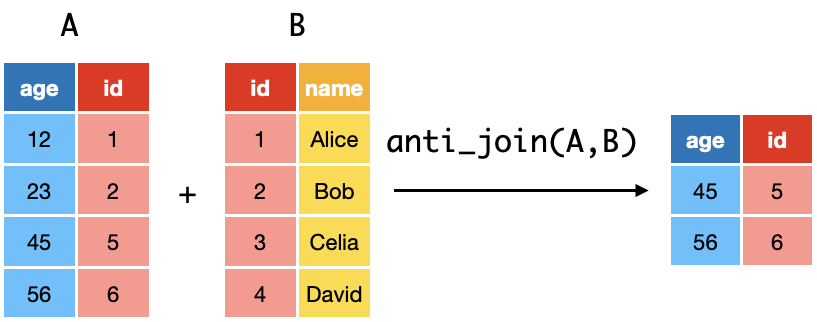

In [ ]:
visit %>% anti_join(lab) 

Note that in this anti-join
- Only `visits` that do **not** have matching ```lab``` record are retained
- No data from the right table ```lab``` is included

---
## Combining rows (datasets with same columns)

Datasets with the same columns/variables can be combined using set operators
- ```union```
- ```intersect```

### Data preparation

We will generate 2 datasets ```data_set_1``` and ```data_set_2``` that come from the same polyclinic source, but differ in the set of ```visitID``` to simulate 2 different tables that have the same columns/variables

In [ ]:
data_join <- visit %>% 
             full_join(patient) %>%
             full_join(diagnosis) %>%
             full_join(lab)

data_set_1 <- data_join %>% 
              filter(VisitID %in% c(1,2,3,4,5,6,7))

data_set_2 <- data_join %>% 
              filter(VisitID %in% c(3,4,5,6,7,8,9,10))

In [ ]:
data_set_1

In [ ]:
data_set_2

### 1. Union

For a `union`, all rows from both datasets are included and duplicate rows are removed

![set_union.png](images/set_union.png)

As an example, we will perform the `union` operation on `data_set_1` and `data_set_2`
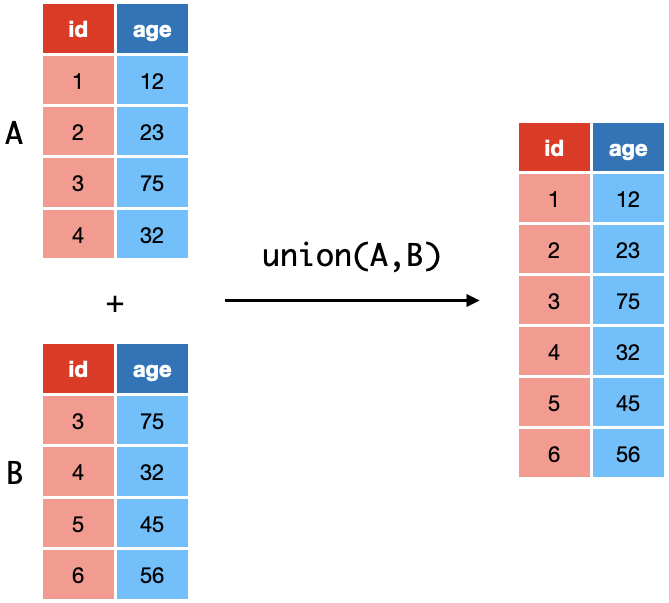

In [ ]:
data_set_1 %>% union(data_set_2)

Note that in the ```union``` of 2 datasets, all duplicate records (overlapping visits) are removed

### 2. Intersect

For an `intersect`, only rows that are matched in `both` tables are included

![set_intersect.png](images/set_intersect.png)

As an example, we will perform the `intersect` operation on `data_set_1` and `data_set_2`
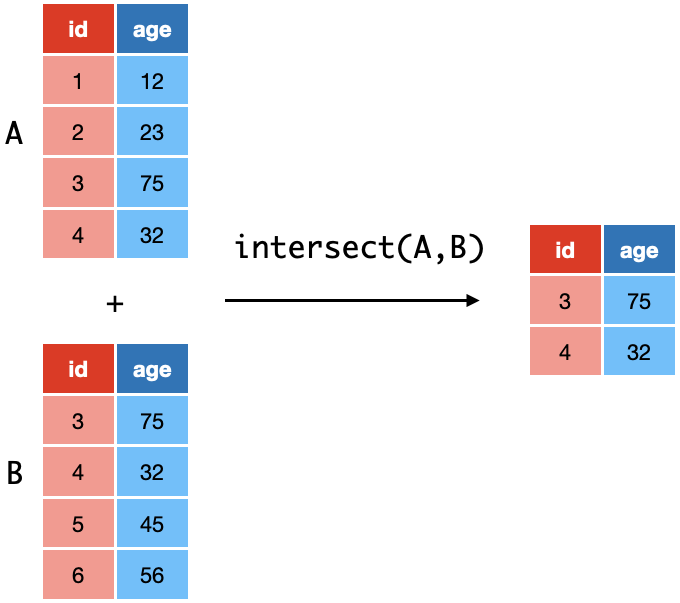

In [ ]:
data_set_1 %>% intersect(data_set_2)

Note that in an ```intersect``` of 2 datasets, only records that appear in both datasets are retained

---
## Exercise - Joining Data

We will use the same simulated polyclinic dataset

In [ ]:
library(tidyverse)

visit <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/tidy_visit.csv")
lab <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/tidy_lab.csv")
diagnosis <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/tidy_diagnosis.csv")
patient <- read_csv("https://raw.githubusercontent.com/kennethban/dataset/main/tidy_patient.csv")

head(visit)
head(lab)
head(diagnosis)
head(patient)

### Part 1

Join the ```visit``` dataset to the ```lab``` dataset, only showing data that have common keys in both datasets

In [ ]:
# start here

In [ ]:
# solution

visit %>% inner_join(lab)

### Part 2

Show the visits and diagnosis from that do not have ```lab``` tests. Do not show the lab test results

In [ ]:
# start here

In [ ]:
# solution

visit %>% 
anti_join(lab) %>% 
left_join(diagnosis)

### Part 3

Combine datasets from ```visit```, ```lab```, ```diagnosis```, and ```patient```, to obtain a dataset that only has data present in _all_ the tables

In [ ]:
# start here

In [ ]:
# solution

visit %>% 
inner_join(lab) %>%
inner_join(diagnosis) %>% 
inner_join(patient)